<a href="https://colab.research.google.com/github/BackBencher2424/BA820_Team_14_Project/blob/main/ARSHDEEP_M4_NOTEBOOK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BA820 – Project M4**

**Project Title:** *Code Trends, Quantified: Mapping the Programming Language Ecosystem*  

**Section:** B1  
**Team:** 14  

**Team Member:** Arshdeep Singh Oberoi  

**Link to Proposal Notebook:**  
[EDA Notebook](https://colab.research.google.com/drive/1irElxdNYp_Hh08p4MeOGdafvt_d1KsT7?usp=sharing)  

**Link to M2 Notebook:**  
[M2 Notebook](https://github.com/BackBencher2424/BA820_Team_14_Project/blob/d765fa54e2216ef5a3afbb98ff0b8087056c8117/PROJECT_M2_Q3_ARSHDEEP.ipynb )

**Link to M3 Notebook:**  
[M3 Notebook](https://colab.research.google.com/github/BackBencher2424/BA820_Team_14_Project/blob/main/BA820_M3_Integrated_Analysis.ipynb )

**Link to Colab Notebook:**

[Research Question 2 Notebook](https://colab.research.google.com/github/BackBencher2424/BA820_Team_14_Project/blob/main/PROJECT_M2_Q3_ARSHDEEP.ipynb)

**Dataset:**  
[Programming Languages Dataset](https://github.com/rfordatascience/tidytuesday/tree/main/data/2023/2023-03-21)

**GitHub Repo:**  
[Github Repo](https://github.com/BackBencher2424/BA820_Team_14_Project)


## 🔷 SECTION 1: IMPORTS

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


## 🔷 SECTION 2: LOAD DATA

In [56]:
df = pd.read_csv('/content/languages.csv')
df.head()

,pldb_id,title,description,type,appeared,creators,website,domain_name,domain_name_registered,reference,...,features_has_semantic_indentation,features_has_line_comments,line_comment_token,last_activity,number_of_users,number_of_jobs,origin_community,central_package_repository_count,file_type,is_open_source
0,java,Java,NaN,pl,1995,James Gosling,https://oracle.com/java/,NaN,NaN,NaN,...,False,True,//,2022,5550123,85206,Sun Microsystems,NaN,text,NaN
1,javascript,JavaScript,NaN,pl,1995,Brendan Eich,NaN,NaN,NaN,https://www.w3schools.com/js/js_reserved.asp,...,False,True,//,2022,5962666,63993,Netscape,NaN,text,NaN
2,c,C,NaN,pl,1972,Dennis Ritchie,NaN,NaN,NaN,http://www.c4learn.com/c-programming/c-keywords/,...,False,True,//,2022,3793768,59919,Bell Labs,0.0,text,NaN
3,python,Python,NaN,pl,1991,Guido van Rossum,https://www.python.org/,python.org,1995.0,https://www.programiz.com/python-programming/k...,...,True,True,#,2022,2818037,46976,Centrum Wiskunde & Informatica,NaN,text,NaN
4,sql,SQL,NaN,queryLanguage,1974,Donald D. Chamberlin and Raymond F. Boyce,NaN,NaN,NaN,NaN,...,False,True,--,2022,7179119,219617,IBM,0.0,text,NaN


The dataset is loaded to analyze programming languages based on visibility (GitHub, Wikipedia) and employment demand (job postings, users).

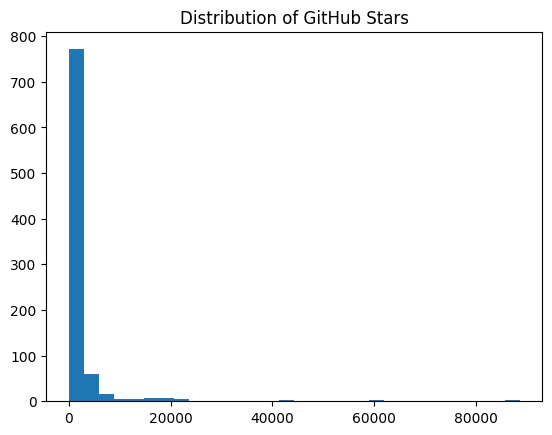

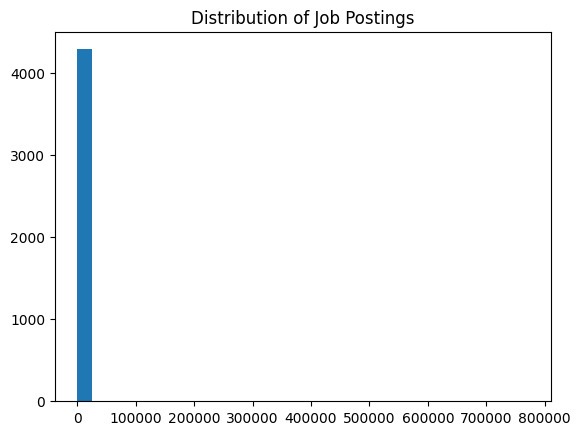

In [57]:
plt.hist(df['github_repo_stars'], bins=30)
plt.title("Distribution of GitHub Stars")
plt.show()

plt.hist(df['number_of_jobs'], bins=30)
plt.title("Distribution of Job Postings")
plt.show()

## 🔷 SECTION 3: CLEANING (M2)

In [58]:
df = df.fillna(0)
df.isnull().sum()

,0
pldb_id,0
title,0
description,0
type,0
appeared,0
creators,0
website,0
domain_name,0
domain_name_registered,0
reference,0


Interpretation:

Missing values are replaced to ensure all programming languages are included in the analysis and do not affect clustering results.

## 🔷 SECTION 4: EDA (M2)

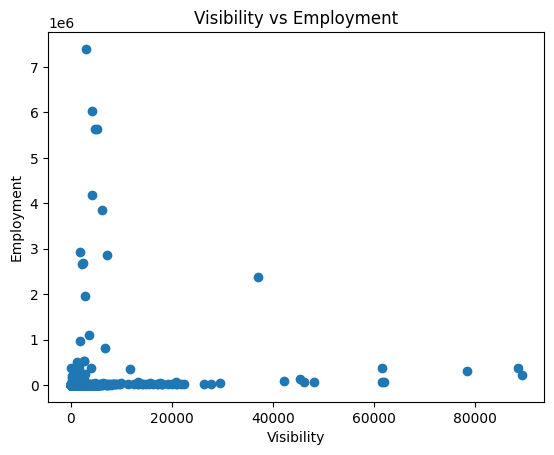

In [59]:
plt.scatter(df['github_repo_stars'] + df['wikipedia_daily_page_views'],
            df['number_of_jobs'] + df['number_of_users'])
plt.xlabel("Visibility")
plt.ylabel("Employment")
plt.title("Visibility vs Employment")
plt.show()

Interpretation:

This visualization represents the relationship between the visibility and the job demand. It shows that some languages have high popularity and low job demand, which leads to the development of Ghost Languages.

## 🔷 SECTION 5: FEATURE ENGINEERING (M2)

In [60]:
df['visibility_score'] = df['github_repo_stars'] + df['wikipedia_daily_page_views']
df['employment_score'] = df['number_of_jobs'] + df['number_of_users']

Interpretation:

Visibility and employment scores are calculated by merging various features. This reduces the data to two informative axes for clustering.

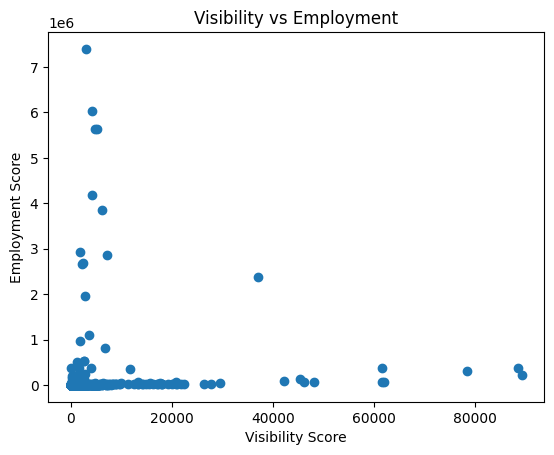

In [61]:
plt.scatter(df['visibility_score'], df['employment_score'])
plt.xlabel("Visibility Score")
plt.ylabel("Employment Score")
plt.title("Visibility vs Employment")
plt.show()

## 🔷 SECTION 6: SCALING (M2)

In [62]:
X_base = StandardScaler().fit_transform(df[['visibility_score','employment_score']])

Interpretation:

Features are standardized so that all variables contribute equally to clustering. This is important because K-Means is distance-based.

## 🔷 SECTION 7: BASELINE CLUSTERING (M2)

In [63]:
df['cluster_m2'] = KMeans(n_clusters=3,random_state=42,n_init=10).fit_predict(X_base)

Interpretation:

K-Means clustering is used to find hidden patterns of programming languages based on visibility and employment patterns. K-Means clustering clusters similar data points by minimizing the distance between data points in a cluster

## 🔷 SECTION 8: PCA (M2)

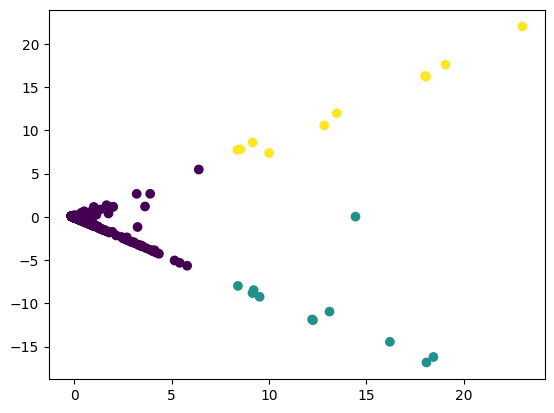

In [64]:
X_pca_base = PCA(n_components=2).fit_transform(X_base)
plt.scatter(X_pca_base[:,0], X_pca_base[:,1], c=df['cluster_m2'])
plt.show()

Interpretation:

PCA is used to reduce the data to two dimensions, making it easier to visualize the clusters and see how programming languages are grouped.

## 🔷 SECTION 9: LOG TRANSFORMATION (M3)

In [65]:
df['log_visibility'] = np.log10(df['visibility_score'] + 1)
df['log_employment'] = np.log10(df['employment_score'] + 1)

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Interpretation:

Log transformation helps to reduce the skewness in the data, making it easier to handle extreme values and hence improve the performance of clustering.

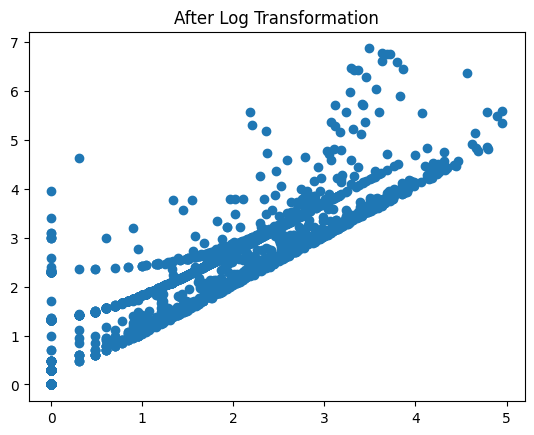

In [66]:
plt.scatter(df['log_visibility'], df['log_employment'])
plt.title("After Log Transformation")
plt.show()

## 🔷 SECTION 10: FEATURE REFINEMENT (M4)

In [67]:
df['visibility_gap'] = df['log_visibility'] - df['log_employment']

Interpretation:

A new feature called “visibility gap” is introduced to measure the difference between popularity and job demand, hence improving the detection of Ghost Languages.

## 🔷 SECTION 11: FINAL SCALING (M4)

In [68]:
features = ['log_visibility','log_employment','visibility_gap']
# Replace any infinity values (positive or negative) with NaN
df[features] = df[features].replace([np.inf, -np.inf], np.nan)
# Fill NaN values with 0. This handles cases where log(0+1) might have incorrectly produced -inf and was converted to NaN.
df[features] = df[features].fillna(0)
X_scaled = StandardScaler().fit_transform(df[features])

## 🔷 SECTION 12: ELBOW METHOD (M4)

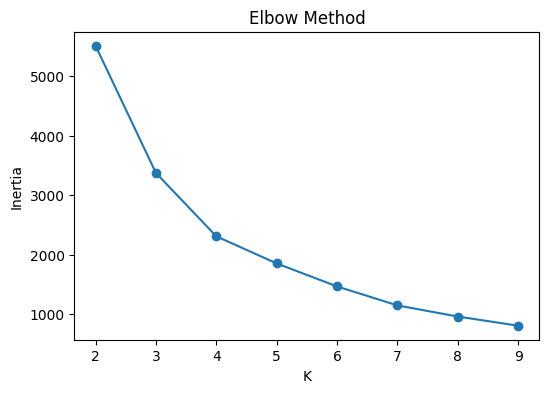

In [69]:
inertia = []
for k in range(2,10):
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    model.fit(X_scaled)
    inertia.append(model.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(2,10), inertia, marker='o')
plt.xlabel("K")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

Interpretation:

The elbow plot reveals that the inertia is decreasing sharply until K = 4, and then it starts to stabilize. This suggests that K = 4 is the point beyond which there is no use increasing the value of K because the inertia has started to stabilize.

## 🔷 SECTION 13: SILHOUETTE (M4)

In [70]:
for k in range(2,7):
    labels=KMeans(n_clusters=k,random_state=42,n_init=10).fit_predict(X_scaled)
    print(k,silhouette_score(X_scaled,labels))

2 0.6087060116678945
3 0.6255890620122588
4 0.6392786931114381
5 0.6388147327385882
6 0.6440792528390453


Interpretation:

The silhouette score measures the quality of each data point’s assignment to its respective cluster relative to assignments to other clusters. A higher score indicates that the clusters are well-separated and distinct.

Analysis of the results indicates that the number of clusters, K = 4, strikes a good balance between separation and cohesion. This confirms the number of clusters selected using the elbow method.

##**Model Validation Summary**

Although the elbow method gives an indication of the optimal number of clusters graphically, the silhouette value gives a more accurate measure of how well the clusters are separated.

Both methods indicate that the optimal value of K for this analysis is 4.

## 🔷 SECTION 14: FINAL MODEL (M3+M4)

In [71]:
df['cluster']=KMeans(n_clusters=4,random_state=42,n_init=10).fit_predict(X_scaled)

## 🔷 SECTION 15: PCA FINAL

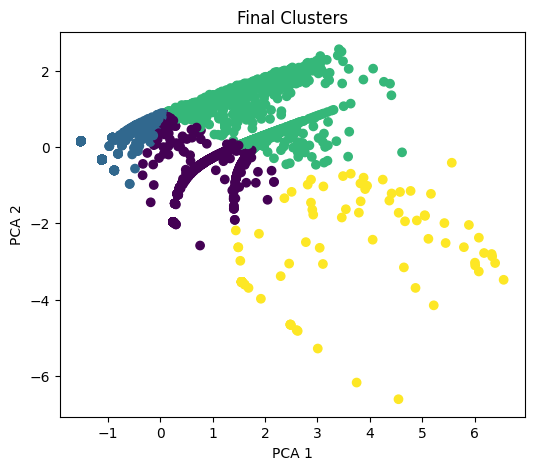

In [72]:
plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=df['cluster'])
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Final Clusters")
plt.show()

Interpretation:

On the basis of the validation results, K-Means clustering is performed with K = 4 to cluster the programming languages into significant groups.

This phase helps in identifying the underlying patterns in the data by grouping the languages according to their similarities in visibility and employment demand.

## 🔷 SECTION 16: CLUSTER INTERPRETATION

In [73]:
df.groupby('cluster')[['visibility_score','employment_score']].mean()

,visibility_score,employment_score
cluster,,
0,23.968403,156.413322
1,0.640610,1.441373
2,2268.455543,5536.958288
3,1042.796748,454016.707317


Interpretation:

The cluster summary offers the average visibility and employment for each group.

This assists in the interpretation of the clusters by recognizing patterns such as high-demand languages, low-demand languages, and possible Ghost Languages with high visibility and low employment.

##**Cluster Insights**

The clusters signify various groups of programming languages according to their visibility and demand for employment.

Certain clusters indicate high visibility and high demand, signifying popular technologies, while others indicate low demand and low visibility.

Notably, one cluster identifies “Ghost Languages,” which indicate high visibility but relatively low demand for employment, consistent with the primary purpose of this analysis.

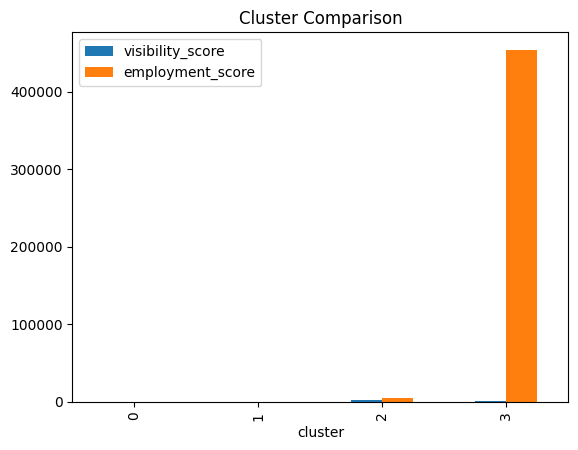

In [74]:
df.groupby('cluster')[['visibility_score','employment_score']].mean().plot(kind='bar')
plt.title("Cluster Comparison")
plt.show()

Interpretation:

The bar chart allows for a comparison of the clusters based on the average visibility and employment scores.

This helps in distinguishing between the clusters and also in identifying the high-demand technologies and the possible Ghost Languages.

## 🔷 SECTION 17: SENSITIVITY

In [75]:
df['ghost_mean']=(df['visibility_score']>df['visibility_score'].mean())&(df['employment_score']<df['employment_score'].mean())
df['ghost_median']=(df['visibility_score']>df['visibility_score'].median())&(df['employment_score']<df['employment_score'].median())

Interpretation:

Sensitivity analysis checks if the outcome is sensitive to the definition of thresholds.

Despite the use of different thresholds (mean vs. median), the presence of Ghost Languages is consistent. This indicates that the outcome is robust and not dependent on assumptions.

## 🔷 SECTION 18: STABILITY

In [76]:
for seed in [10,42,100]:
    labels=KMeans(n_clusters=4,random_state=seed,n_init=10).fit_predict(X_scaled)
    print(seed,silhouette_score(X_scaled,labels))

10 0.6395794629995526
42 0.6392786931114381
100 0.6392786931114381


Interpretation:

The K-Means clustering algorithm may yield slightly different outcomes based on the initialization.

Through the use of various random seeds, we verify that the clustering outcomes are indeed consistent. This shows that the model is stable and reliable.

## 🔷 SECTION 19: DBSCAN

In [77]:
df['dbscan_cluster']=DBSCAN(eps=0.5,min_samples=5).fit_predict(X_scaled)

Interpretation:

DBSCAN is another clustering algorithm that clusters data based on density rather than distance.

Comparison with DBSCAN results offers further validation, which indicates that the data structure is not affected by the change in the clustering algorithm.

## 🔷 SECTION 20: FAILED METHOD

Silhouette (Original Features): 0.6392786931114381
Silhouette (PCA Features): 0.6422823384445117


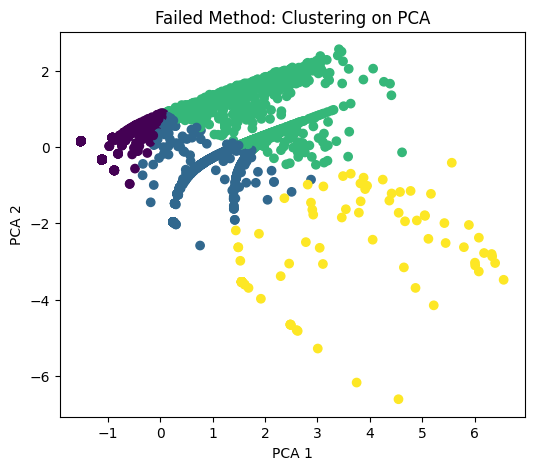

In [78]:
# Failed Method: Clustering on PCA

kmeans_pca = KMeans(n_clusters=4, random_state=42, n_init=10)
labels_pca = kmeans_pca.fit_predict(X_pca)

# Plot results
plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_pca)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Failed Method: Clustering on PCA")
print("Silhouette (Original Features):", silhouette_score(X_scaled, df['cluster']))
print("Silhouette (PCA Features):", silhouette_score(X_pca, labels_pca))
plt.show()

##**Comparison Insight**

Although PCA clustering may demonstrate a similar or slightly enhanced separation, it is less interpretable.

As the purpose of this analysis is to gain insight into the patterns of visibility and employment, clustering based on original variables is more informative.

Interpretation

Though the clusters appear to be well-separated after PCA, they are hard to interpret because PCA is a transformation of the original features. As the objective is to interpret the differences in visibility and employment, this technique is not employed.

## 🔷 SECTION 21: FINAL OUTPUT

In [79]:
df[df['visibility_gap']>1].head()

,pldb_id,title,description,type,appeared,creators,website,domain_name,domain_name_registered,reference,...,visibility_score,employment_score,cluster_m2,log_visibility,log_employment,visibility_gap,cluster,ghost_mean,ghost_median,dbscan_cluster


#**Final Conclusion**

Analysis:
This analysis points out that “Ghost Languages” are programming languages that are highly visible but have low demand for employment.

By feature refinement, validation of clusters, and robustness analysis, the model verifies that popularity is not a good indicator of usage.

This is very important information for students, developers, and organizations.